# 1. What does the salary outcomes of different college degrees look like?

With just the end of my undergraduate career, lately I've been thinking more and more about what other college majors are/or capable of making. Often times I have always wondered how different college degrees match with others in terms of salary __over time__ and also curious to see where my postgrad degree might take me. With the help of datacamp and the dataset from PayScale Inc., published by the Wall Street Journal, I was able to use K means clustering to explore the short and long term financial implications of college degree salary outcomes.


__INFORMATION ON DATASET:__
The data used in this notebook is collected from a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc., made available by the Wall Street Journal for their article Ivy League's Big Edge: Starting Pay (note this is from 2008). 

__SHORT OUTLINE:__
After doing some data clean up, we'll compare the recommendations from three different methods for determining the optimal number of clusters, apply a k-means clustering analysis, and visualize the results.



## Lets Start

To begin, we prepare our environment by:

-installing packages
-loading libraries
-loading in the dataset

then get a quick glimpse of what our data set looks like.

In [2]:
install.packages("factoextra")

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rumil\AppData\Local\Temp\RtmpWUclDO\downloaded_packages


In [4]:
#setting working directory
setwd("C:/Users/Rumil/Datasets")

# Loading packages

library(tidyverse)
library(cluster)
library(factoextra)

#reading in dataset
degrees <- read_csv("C:/Users/Rumil/Datasets/COLLEGE DEGREES DS.csv",
                    col_names= c( "College.Major",
                                 "Starting.Median.Salary",
                                 "Mid.Career.Median.Salary", 
                                 "Career.Percent.Growth", 
                                 "Percentile.10", 
                                 "Percentile.25",
                                 "Percentile.75",
                                 "Percentile.90"),
                    skip = 1)



#Summary of the data frame

summary(degrees)   
head(summary, 5)
head(degrees)
glimpse(degrees)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'factoextra' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Parsed with column specification:
cols(
  College.Major = col_character(),
  Starting.Median.Salary = col_character(),
  Mid.Career.Median.Salary = col_character(),
  Career.Percent.Growth = col_double(),
  P

 College.Major      Starting.Median.Salary Mid.Career.Median.Salary
 Length:50          Length:50              Length:50               
 Class :character   Class :character       Class :character        
 Mode  :character   Mode  :character       Mode  :character        
                                                                   
                                                                   
                                                                   
 Career.Percent.Growth Percentile.10      Percentile.25      Percentile.75     
 Min.   : 23.40        Length:50          Length:50          Length:50         
 1st Qu.: 59.12        Class :character   Class :character   Class :character  
 Median : 67.80        Mode  :character   Mode  :character   Mode  :character  
 Mean   : 69.27                                                                
 3rd Qu.: 82.42                                                                
 Max.   :103.50                             

                         
1 function (object, ...) 
2 UseMethod("summary")   

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Growth,Percentile.10,Percentile.25,Percentile.75,Percentile.90
Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"


Observations: 50
Variables: 8
$ College.Major            <chr> "Accounting", "Aerospace Engineering", "Ag...
$ Starting.Median.Salary   <chr> "$46,000.00", "$57,700.00", "$42,600.00", ...
$ Mid.Career.Median.Salary <chr> "$77,100.00", "$101,000.00", "$71,900.00",...
$ Career.Percent.Growth    <dbl> 67.6, 75.0, 68.8, 67.1, 84.6, 81.3, 67.0, ...
$ Percentile.10            <chr> "$42,200.00", "$64,300.00", "$36,300.00", ...
$ Percentile.25            <chr> "$56,100.00", "$82,100.00", "$52,100.00", ...
$ Percentile.75            <chr> "$108,000.00", "$127,000.00", "$96,300.00"...
$ Percentile.90            <chr> "$152,000.00", "$161,000.00", "$150,000.00...


## 2. Data Cleaning

Our salary data is in currency format, which R considers a string. Let's strip those special characters using the _gsub function_ and convert all of our columns except College.Major to __numeric.__

We can also convert the Career.Percent.Growth column to a decimal value.

In [5]:
# Clean up the data
degrees_clean <- degrees %>% 
    mutate_at(vars(Starting.Median.Salary:Percentile.90), 
              function(x) as.numeric(gsub("[\\$,]","",x))) %>% mutate(Career.Percent.Growth = Career.Percent.Growth / 100)
 
#Print post data cleaning
head(degrees_clean)

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Growth,Percentile.10,Percentile.25,Percentile.75,Percentile.90
Accounting,46000,77100,0.676,42200,56100,108000,152000
Aerospace Engineering,57700,101000,0.750,64300,82100,127000,161000
Agriculture,42600,71900,0.688,36300,52100,96300,150000
Anthropology,36800,61500,0.671,33800,45500,89300,138000
Architecture,41600,76800,0.846,50600,62200,97000,136000
Art History,35800,64900,0.813,28800,42200,87400,125000


## 3. The elbow method

Now that we have a more manageable dataset, let's begin our __clustering analysis by determining how many clusters we should be modeling.__ The best number of clusters for an unlabeled dataset is not always a clear-cut answer, but fortunately there are several techniques to help us optimize. We'll work with three different methods to compare recommendations:

1. Elbow Method
2. Silhouette Method
3. Gap Statistic Method

First up will be the Elbow Method. This method plots the percent variance against the number of clusters. The __"elbow"__ bend of the __curve indicates the optimal point at which adding more clusters will no longer explain a significant amount of the variance.__ 

To begin, let's select and scale the following features to base our clusters on: Starting.Median.Salary, Mid.Career.Median.Salary, Perc.10, and Perc.90. Then we'll use the fviz_nbclust function from the factoextra library to determine and visualize the optimal number of clusters.

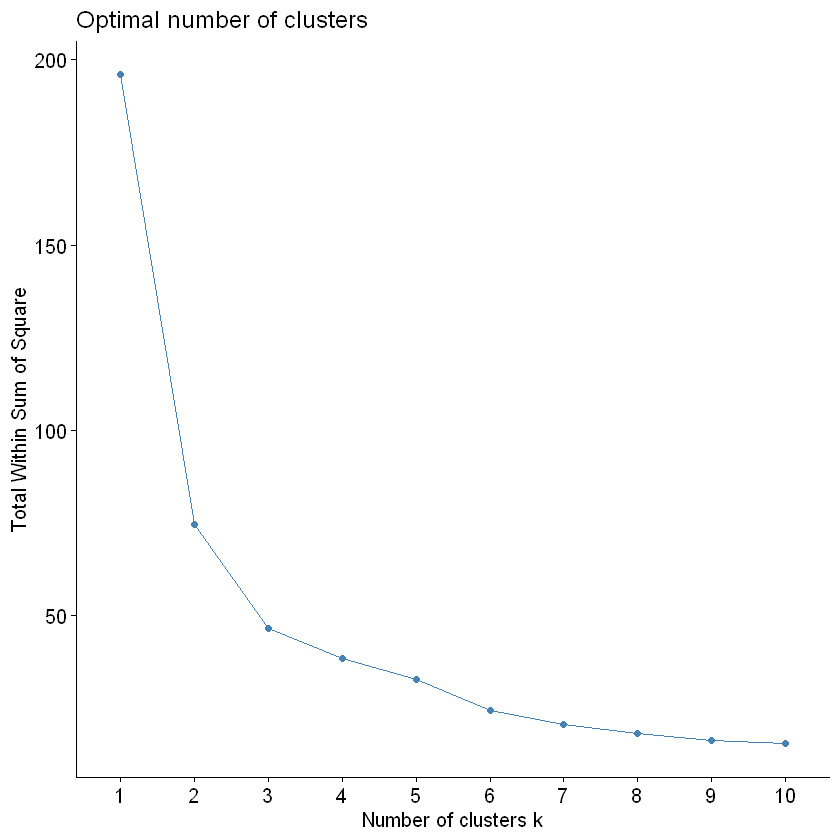

In [7]:
# Select and scale the relevant features and store as k_means_data
k_means_data <- degrees_clean %>% 
    select(Starting.Median.Salary, Mid.Career.Median.Salary, Percentile.10, Percentile.90) %>% 
    scale()
     

# Run the fviz_nbclust function with our selected data and method "wss"
elbow_method <- fviz_nbclust(k_means_data,FUNcluster = kmeans, method = "wss")

# View the plot
elbow_method

## 4. The silhouette method

Instead of needing to "manually" apply the elbow method by running multiple k_means models and plotting the calculated the total within cluster sum of squares for each potential value of k, fviz_nbclust handled all of this for us behind the scenes. 

Can we use it for the Silhouette Method as well? __The Silhouette Method will evaluate the quality of clusters by how well each point fits within a cluster, maximizing average "silhouette" width.__

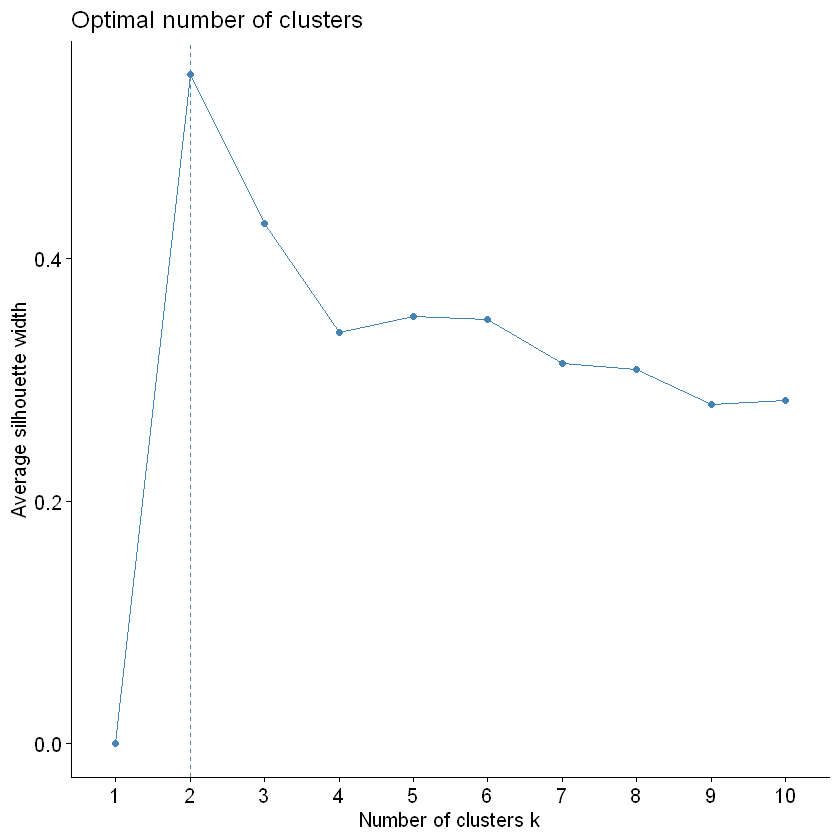

In [8]:
# Running the fviz_nbclust function with the method "silhouette" instead 
silhouette_method <- fviz_nbclust(k_means_data, FUNcluster = kmeans, method = "silhouette")

# View the plot
silhouette_method

## 5. The gap statistic method


For our final method, let's see what the Gap Statistic Method has to say about this. The __Gap Statistic Method will compare the total variation within clusters for different values of k to the null hypothesis, maximizing the "gap."__

The "null (baseline) hypothesis" refers to a uniformly distributed simulated reference dataset with no observable clusters, generated by aligning with the principle components of our original dataset. 

In other words, how much more variance is explained by k clusters in our dataset than in a fake dataset where all majors have equal salary potential?

Fortunately, we have the _clusGap function_ to calculate this behind the scenes and the _fviz_gap_stat function_ to visualize the results.

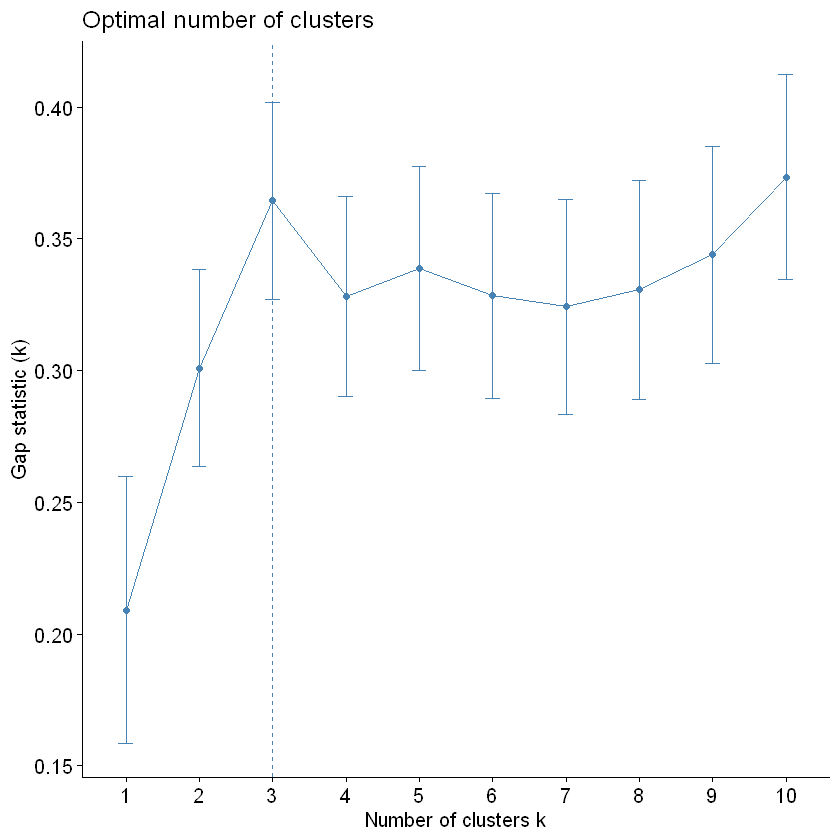

In [9]:
# Use the clusGap function to apply the Gap Statistic Method
gap_stat <- clusGap(k_means_data, FUNcluster = kmeans, nstart = 25, K.max = 10, B = 50)

# Use the fviz_gap_stat function to vizualize the results
gap_stat_method <- fviz_gap_stat(gap_stat)

# View the plot
gap_stat_method

## 6. K-means algorithm

Looks like the Gap Statistic Method agreed with the Elbow Method! According to majority rule, let's use 3 for our optimal number of clusters. With this information, we can now run our k-means algorithm on the selected data. We will then add the resulting cluster information to label our original dataframe.

In [10]:
# Setting a random seed
set.seed(111) #arbitrary number for better reproducibility 

# Set k equal to the optimal number of clusters
num_clusters <- 3

# Running the k-means algorithm 
k_means <- kmeans(k_means_data, centers = num_clusters, iter.max = 15, nstart = 25)

# Label the clusters of degrees_clean
degrees_labeled <- degrees_clean %>% 
    mutate(clusters = k_means$cluster)

#Print new dataset with clusters column (1, 2 , or 3) added in 
degrees_labeled

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Growth,Percentile.10,Percentile.25,Percentile.75,Percentile.90,clusters
Accounting,46000,77100,0.676,42200,56100,108000,152000,1
Aerospace Engineering,57700,101000,0.750,64300,82100,127000,161000,2
Agriculture,42600,71900,0.688,36300,52100,96300,150000,1
Anthropology,36800,61500,0.671,33800,45500,89300,138000,3
Architecture,41600,76800,0.846,50600,62200,97000,136000,1
Art History,35800,64900,0.813,28800,42200,87400,125000,3
Biology,38800,64800,0.670,36900,47400,94500,135000,3
Business Management,43000,72100,0.677,38800,51500,102000,147000,1
Chemical Engineering,63200,107000,0.693,71900,87300,143000,194000,2
Chemistry,42600,79900,0.876,45300,60700,108000,148000,1


# 7. Visualizing the clusters

Now for the pretty part: __visualizing our results.__ First let's take a look at how each cluster compares in Starting vs. Mid Career Median Salaries. What do the clusters say about the relationship between Starting and Mid Career salaries? Lets visualize this.

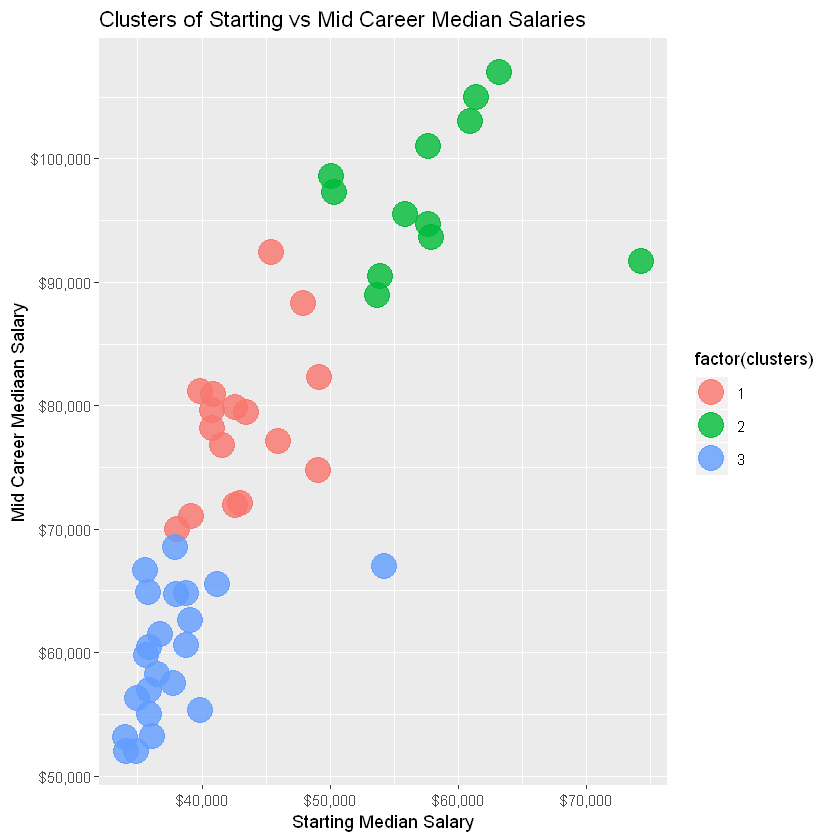

In [11]:
# Graph the clusters by Starting and Mid Career Median Salaries
career_growth <- ggplot(degrees_labeled, aes(Starting.Median.Salary, Mid.Career.Median.Salary, color = factor(clusters))) + 
                        geom_point(aes(), alpha = 4/5, size = 7) +
                        xlab("Starting Median Salary") +
                        ylab("Mid Career Mediaan Salary") +
                        ggtitle("Clusters of Starting vs Mid Career Median Salaries") +
                        scale_x_continuous(labels = scales::dollar) +
                        scale_y_continuous(labels = scales::dollar)

# View the plot
career_growth


## 8. A deeper dive into the clusters
Unsurprisingly, most of the data points are hovering in the top left corner, with a relatively linear relationship. In other words, the higher your starting salary, the higher your mid career salary. 

How might the clusters reflect potential mid career growth? There are also a couple curious outliers from clusters 1 and 3... perhaps this can be explained by investigating the mid career percentiles further, and exploring which majors fall in each cluster.

Right now, we have a column for each percentile salary value. In order to visualize the clusters and majors by mid career percentiles, we'll need to reshape the degrees_labeled data using tidyr's gather function to make a percentile key column and a salary value column to use for the axes of our following graphs. We'll then be able to examine the contents of each cluster to see what stories they might be telling us about the majors.

In [12]:
# Use the gather function to reshape degrees and 
# mutate() to reorder the new percentile column
degrees_perc <- degrees_labeled %>%
select(College.Major, Percentile.10, Percentile.25, Mid.Career.Median.Salary, Percentile.75, Percentile.90, clusters) %>% 
    gather("percentile", "salary", -c(College.Major, clusters)) %>% 
    mutate(percentile = factor(percentile, levels=c('Percentile.10', 'Percentile.25','Mid.Career.Median.Salary', 'Percentile.75', 'Percentile.90')))
    

#Print to check it out, now we see the percentile and salary coloumn so now we can graph
degrees_perc




College.Major,clusters,percentile,salary
Accounting,1,Percentile.10,42200
Aerospace Engineering,2,Percentile.10,64300
Agriculture,1,Percentile.10,36300
Anthropology,3,Percentile.10,33800
Architecture,1,Percentile.10,50600
Art History,3,Percentile.10,28800
Biology,3,Percentile.10,36900
Business Management,1,Percentile.10,38800
Chemical Engineering,2,Percentile.10,71900
Chemistry,1,Percentile.10,45300


# 9. The Liberal Arts cluster

Let's graph Cluster 3 and examine the results.


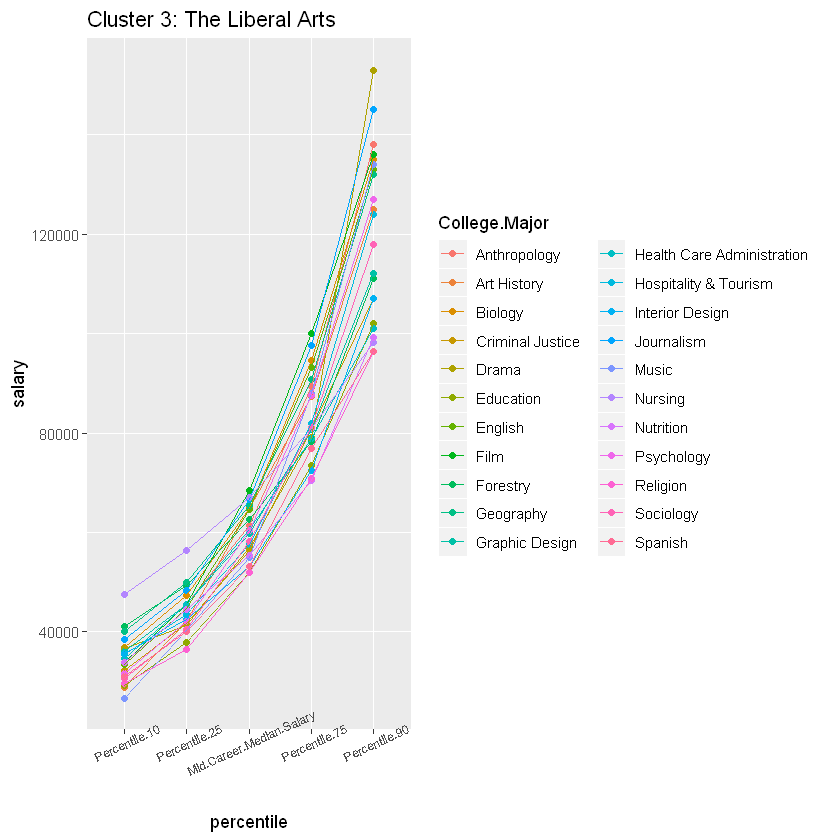

In [13]:
#Graphing the majors of Cluster 1 by percentile
cluster_3 <- degrees_perc %>% 
filter(clusters == 3) %>%
ggplot(aes(group = College.Major, color = College.Major, percentile, salary)) +
geom_point() +
geom_line() +
ggtitle("Cluster 3: The Liberal Arts")+

theme(axis.text.x=element_text(size=7, angle=25))
#view the plot
cluster_3

## Analysis

- We see that these __arts majors may have the riskiest position__ in the lowest percentile, __but__ there is hope for __who can make it__.

- We also see that music is in the lowest 10th percentile salary, but Drama wins the highest growth potential in the 90th percentile for this cluster, __which makes sense as we hear these individuals on the radio or see them in movies right?__

- As for nursing, although __it has a highest sagety net within this cluster but is easily outpaced by other major in higher percentiles.__

- Also worth noting, that these majors leading to lower-paying jobs are typically women-dominated according to a study by Glassdoor: (https://www.glassdoor.com/research/app/uploads/sites/2/2017/04/FULL-STUDY-PDF-Gender-Pay-Gap2FCollege-Major.pdf)
in which the study points out that:

_"The single biggest cause of the gender pay gap is occupation and industry sorting of men and women into jobs that pay differently throughout the economy. In the U.S., occupation and industry sorting explains 54 percent of the overall pay gap—by far the largest factor."_

Does this imply that women are statistically choosing majors with lower pay potential, or do certain jobs pay less because women choose them...?





# 10. The "In-Between" cluster 

Now on to Cluster 1, and the results 

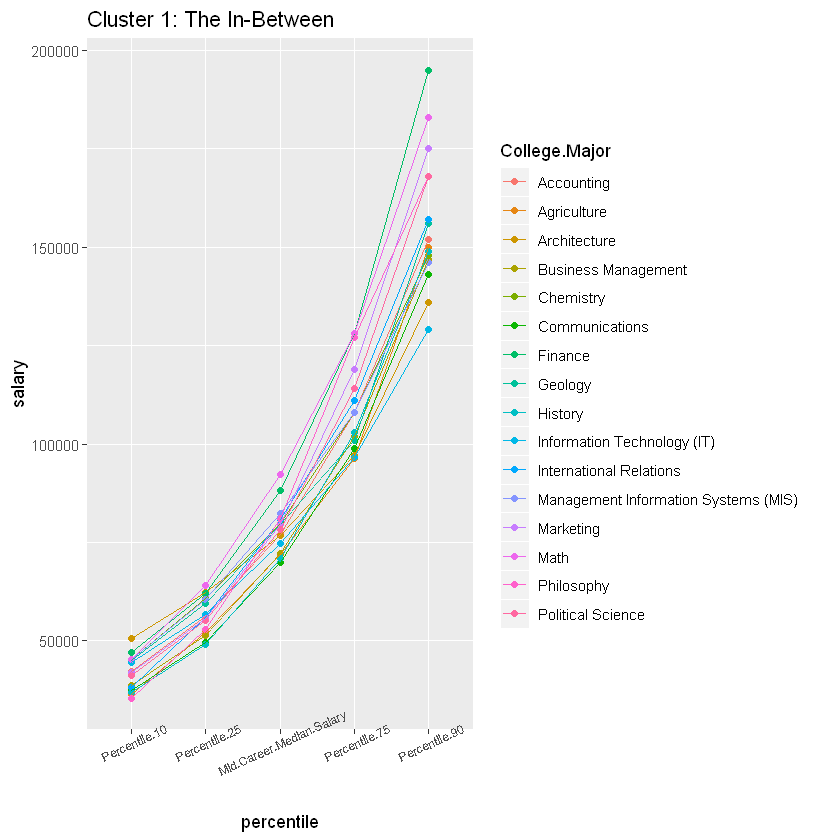

In [14]:
#Cluster 1
cluster_1 <- degrees_perc %>% 
filter(clusters == 1) %>%
ggplot(aes(group = College.Major, color = College.Major, percentile, salary)) +
geom_point() +
geom_line() +
ggtitle("Cluster 1: The In-Between")+

theme(axis.text.x=element_text(size=7, angle=25))

#View the plot
cluster_1

## Analysis

-__right in the middle!__ Accountants are known for having stable job security, but once you're in the big leagues you may be surprised to find that __Marketing or Philosophy can ultimately result in higher salaries.__

-The majors of this cluster are fairly middle of the road in our dataset, starting off __not too low and not too high__ in the lowest percentile.

-This cluster also represents the majors with the greatest differential between the lowest and highest percentiles.

# 11. The over achiever cluster

Finally, let's visualize Cluster 2. 

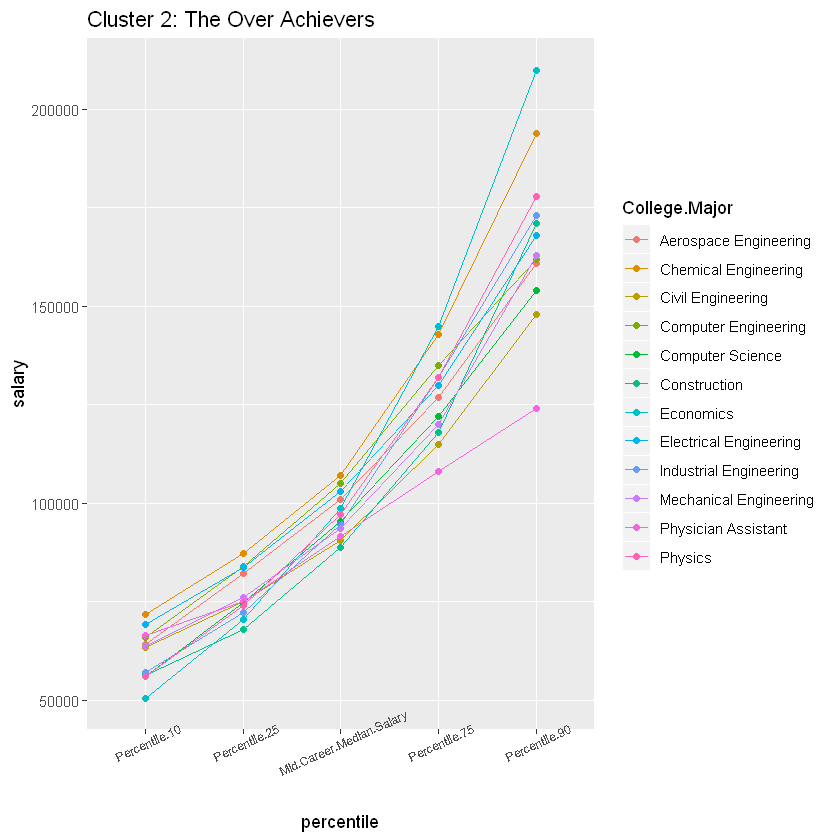

In [34]:
#Cluster 2
cluster_2 <- degrees_perc %>% 
filter(clusters == 2) %>%
ggplot(aes(group = College.Major, color = College.Major, percentile, salary)) +
geom_point() +
geom_line() +
ggtitle("Cluster 2: The Over Achievers")+

theme(axis.text.x=element_text(size=7, angle=25))

#View the plot
cluster_2

## Analysis

-__If you want financial security, these are the majors to choose from.__ 

-These engineers of sorts, represent the highest growth potential in the 90th percentile, as well as the __best security in the 10th percentile rankings.__

Question is are we surprised?

# 12. A conclusion of what we've learned and an interesting question to leave off on

-The liberal arts cluster, although may be the __lowest and somewhat riskiest majors the upside can be limitless.__ Also a good question to ponder on is that these majors are typically popular and mainly _dominated by among women._

The In-Between cluster, as we can see is __right in the middle__ but we can begin to see the higher percentile ranges to reaching higher and higher especially for _finance and marketing majors_

-Lastly, the Over Achievers cluster, typically math, science, and engineering based __start and end careers off at the highest salaries__, but then again is it surprising? ALso, might be worth exploring why these fields pay so much and _why it is typically male dominated as well._


_As a note to myself_, while it's tempting to focus on __starting career salaries__ when choosing a major, __it's important to also consider the growth potential down the road.__ 

Keep in mind that whether a major falls into the Liberal Arts, In-Between, or Over Achievers cluster, one's financial destiny will __certainly be influenced by numerous other factors__ including the school attended, location, passion or talent for the subject, and of course the actual career pursued.

## __SO which two careers tied for the highest career percent growth?__ 

Lets find out


In [15]:
# Sorting degrees by Career.Percent.Growth
degrees_labeled %>% arrange(desc(Career.Percent.Growth))

#Print results
highest_career_growth

# Two majors tied for highest career growth potential are...

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Growth,Percentile.10,Percentile.25,Percentile.75,Percentile.90,clusters
Math,45400,92400,1.035,45200,64200,128000,183000,1
Philosophy,39900,81200,1.035,35500,52800,127000,168000,1
International Relations,40900,80900,0.978,38200,56000,111000,157000,1
Economics,50100,98600,0.968,50600,70600,145000,210000,2
Marketing,40800,79600,0.951,42100,55600,119000,175000,1
Physics,50300,97300,0.934,56000,74200,132000,178000,2
Political Science,40800,78200,0.917,41200,55300,114000,168000,1
Chemistry,42600,79900,0.876,45300,60700,108000,148000,1
Journalism,35600,66700,0.874,38400,48300,97700,145000,3
Architecture,41600,76800,0.846,50600,62200,97000,136000,1


ERROR: Error in eval(expr, envir, enclos): object 'highest_career_growth' not found


## MATH & PHILOSOPHY

Before I would have easily assumed it would be something like doctor, lawyer, or engineer. Pretty interesting to see my own preconcieved opinions being wrong.